<a href="https://colab.research.google.com/github/kavyabanka/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d saloni1712/threads-an-instagram-app-reviews

  0% 0.00/1.08M [00:00<?, ?B/s]
100% 1.08M/1.08M [00:00<00:00, 181MB/s]


In [5]:
!unzip -q threads-an-instagram-app-reviews.zip

In [44]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
import pandas as pd

df = pd.read_csv('/content/threads-an-instagram-app-reviews.zip', error_bad_lines=False)
df.size

131640

In [9]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
df.dtypes

source                object
review_description    object
rating                 int64
review_date           object
dtype: object

In [12]:
df.isna().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

##Data Visualisation

In [13]:
df['source'].value_counts()

Google Play    30270
App Store       2640
Name: source, dtype: int64

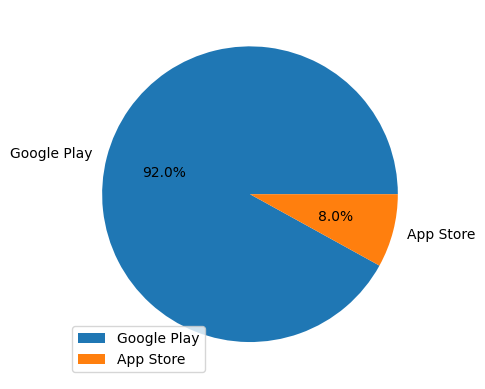

In [14]:
#checking the source where review is more
y=df['source'].value_counts()
labels=['Google Play','App Store']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='source', ylabel='count'>

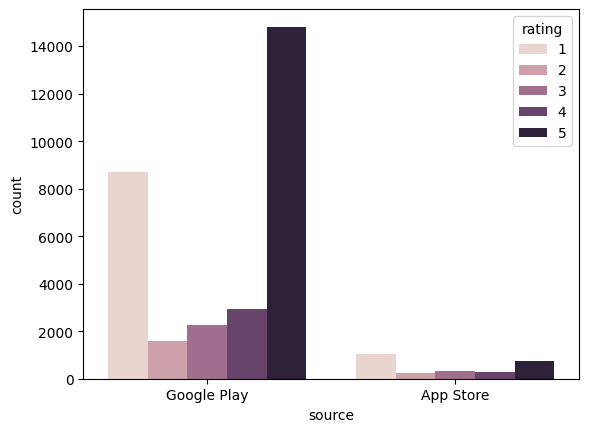

In [15]:
sns.countplot(x='source',data=df,hue='rating')

<Axes: xlabel='rating', ylabel='Count'>

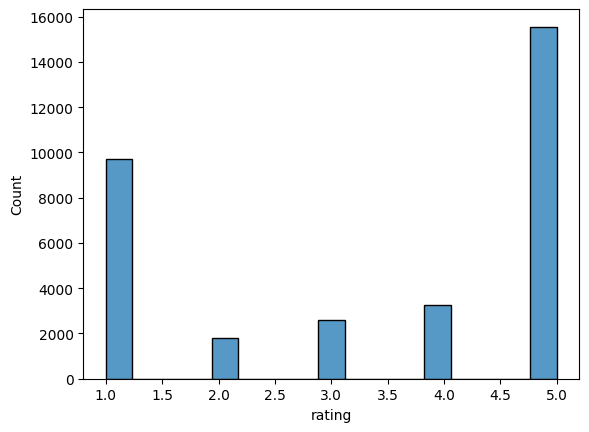

In [16]:
sns.histplot(x='rating',data=df)

In [17]:
#clubbing  rating 1 and 2 as '-1' , 3 as '0' and 4,5 as '1'
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,0,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",0,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",0,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",0,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,-1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,-1,2023-07-19 08:01:06
32907,App Store,bad twister,-1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,-1,2023-07-07 17:47:16


In [18]:
df.drop(['source','review_date'],axis=1,inplace=True)

In [19]:
df

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,-1
1,Pretty good for a first launch!! Its easy to u...,0
2,"For a brand new app, it's very well optimized....",0
3,"Great app with a lot of potential! However, th...",0
4,"The app is good, but it needs a lot of functio...",0
...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1
32906,Add Search and hashtag like Twitter !,-1
32907,bad twister,-1
32908,Yet another trash from Meta.,-1


In [20]:
df['rating'].unique()

array([-1,  0,  1])

In [21]:
rev=df.review_description
rev

0        Meh. Not the greatest experience on a Chromebo...
1        Pretty good for a first launch!! Its easy to u...
2        For a brand new app, it's very well optimized....
3        Great app with a lot of potential! However, th...
4        The app is good, but it needs a lot of functio...
                               ...                        
32905    This killed my dog. Mark zuckerburg strangled ...
32906                Add Search and hashtag like Twitter !
32907                                          bad twister
32908                         Yet another trash from Meta.
32909    Nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [22]:
#remove special characters
rev=rev.str.replace('[^a-zA-Z0-9]+'," ")
rev

0        Meh Not the greatest experience on a Chromeboo...
1        Pretty good for a first launch Its easy to use...
2        For a brand new app it s very well optimized H...
3        Great app with a lot of potential However ther...
4        The app is good but it needs a lot of function...
                               ...                        
32905    This killed my dog Mark zuckerburg strangled h...
32906                 Add Search and hashtag like Twitter 
32907                                          bad twister
32908                         Yet another trash from Meta 
32909    Nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [23]:
#plotting the word cloud of negative values
a=df.loc[df['rating']==-1][['review_description','rating']]
a

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,-1
5,"Currently, it's very challenging to use. It's ...",-1
6,I still don’t want to see content from people ...,-1
7,Could be great if all pages loaded when you cl...,-1
10,"Over all, the UI of this app is good. Using it...",-1
...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1
32906,Add Search and hashtag like Twitter !,-1
32907,bad twister,-1
32908,Yet another trash from Meta.,-1


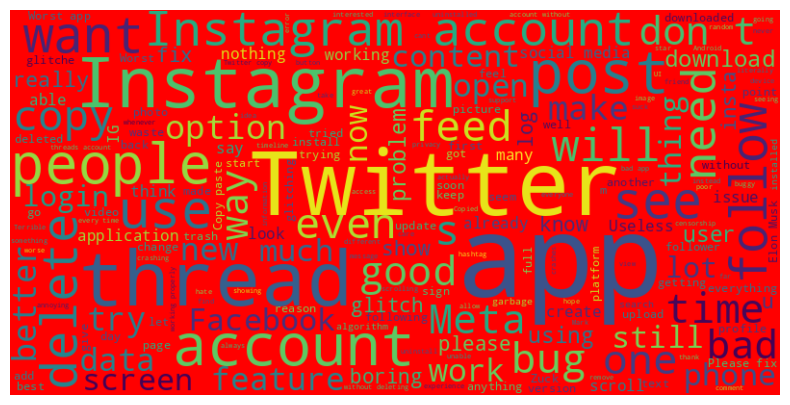

In [24]:
text_corpus = ' '.join(a['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#plotting the word cloud of neutral values
b=df.loc[df['rating']==0][['review_description','rating']]
b

,review_description,rating
1,Pretty good for a first launch!! Its easy to u...,0
2,"For a brand new app, it's very well optimized....",0
3,"Great app with a lot of potential! However, th...",0
4,"The app is good, but it needs a lot of functio...",0
8,I'm liking the concept! There is room for impr...,0
...,...,...
32857,Please add arabic language .,0
32862,Add gyphy - to reply 🙏 love new apps!,0
32864,i really just wanna say anything i want,0
32870,Threads is Twitter without a soul. It’s not tr...,0


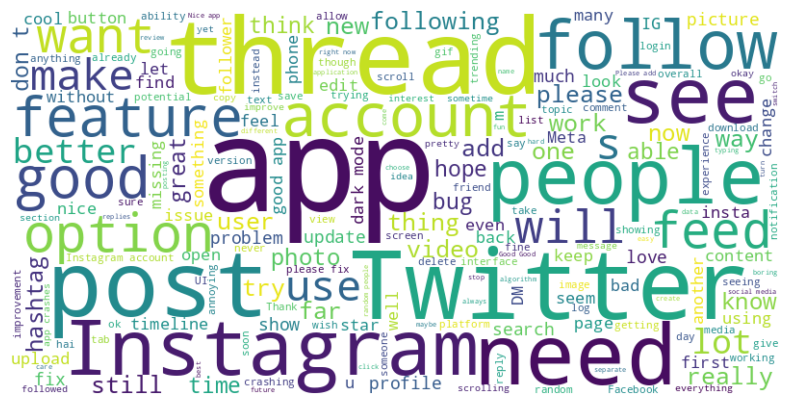

In [26]:
text_corpus = ' '.join(b['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#plotting the word cloud of positive values
c=df.loc[df['rating']==1][['review_description','rating']]
c

,review_description,rating
9,Not bad! This is its first launch. There is st...,1
21,"Firstly, I want to express my appreciation for...",1
22,It's not bad so far. A handful of unsolicited ...,1
29,Great App! Loved it from the very first day al...,1
32,It's addicting but feels cramped and messy bec...,1
...,...,...
32890,I’m done with twitter,1
32892,But it’s not Twitter,1
32899,First review!,1
32900,Meta the greatest thread #mark Z,1


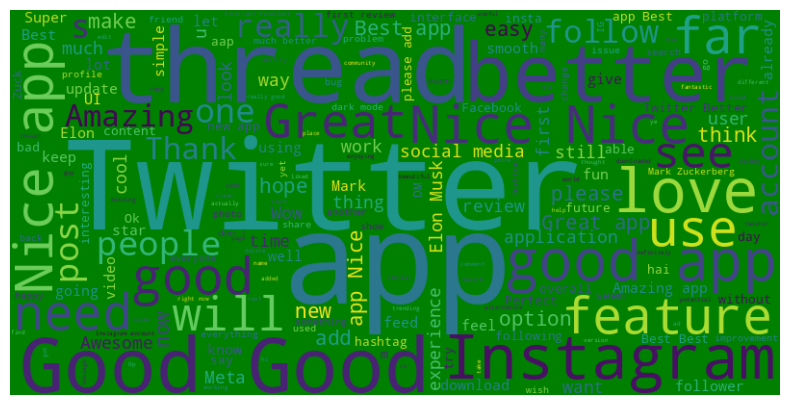

In [28]:
text_corpus = ' '.join(c['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##STEMMING AND TOKENOZATION

In [29]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [30]:
ps=PorterStemmer()
rev=rev.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y: " ".join(y))
rev

0        meh not the greatest experi on a chromebook se...
1        pretti good for a first launch it easi to use ...
2        for a brand new app it s veri well optim howev...
3        great app with a lot of potenti howev there is...
4        the app is good but it need a lot of function ...
                               ...                        
32905    thi kill my dog mark zuckerburg strangl him my...
32906                  add search and hashtag like twitter
32907                                          bad twister
32908                            yet anoth trash from meta
32909       noth special thi app is just a copi of twitter
Name: review_description, Length: 32910, dtype: object

##Removing Stopwords

In [31]:
from nltk.corpus import stopwords
st=stopwords.words('english')
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
rev

0        meh greatest experi chromebook seem custom pho...
1        pretti good first launch easi use self explana...
2        brand new app veri well optim howev miss quit ...
3        great app lot potenti howev lot need fix examp...
4        app good need lot function exampl search topic...
                               ...                        
32905        thi kill dog mark zuckerburg strangl dog gone
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                 yet anoth trash meta
32909                    noth special thi app copi twitter
Name: review_description, Length: 32910, dtype: object

In [32]:
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y:" ".join(y))
rev

0        meh greatest experi chromebook seem custom pho...
1        pretti good first launch easi use self explana...
2        brand new app veri well optim howev miss quit ...
3        great app lot potenti howev lot need fix examp...
4        app good need lot function exampl search topic...
                               ...                        
32905        thi kill dog mark zuckerburg strangl dog gone
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                 yet anoth trash meta
32909                    noth special thi app copi twitter
Name: review_description, Length: 32910, dtype: object

##TFIDF VECTORISATION

##Model Building

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['review_description'], df['rating'], test_size=0.2, random_state=42)

In [46]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Model Building and Evaluation

In [55]:
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train_tfidf,y_train)
  y_pred=model.predict(X_test_tfidf)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

          -1       0.79      0.76      0.77      2310
           0       0.36      0.02      0.03       484
           1       0.81      0.93      0.87      3788

    accuracy                           0.80      6582
   macro avg       0.65      0.57      0.56      6582
weighted avg       0.77      0.80      0.77      6582

DecisionTreeClassifier()
              precision    recall  f1-score   support

          -1       0.71      0.67      0.69      2310
           0       0.17      0.12      0.14       484
           1       0.79      0.85      0.82      3788

    accuracy                           0.73      6582
   macro avg       0.56      0.54      0.55      6582
weighted avg       0.72      0.73      0.72      6582

RandomForestClassifier()
              precision    recall  f1-score   support

          -1       0.75      0.76      0.75      2310
           0       0.07      0.00      0.01       484
           1       

In [50]:
y_new=model.predict(tf1.transform(["Threads is an exceptional film that artfully weaves together powerful storytelling, outstanding performances and breathtaking visuals to deliver a poignant and thought-provoking cinematic experience"]))
if y_new==-1:
    print("Negative")
if y_new==0:
    print("Neutral")
if y_new==1:
    print("Positive")

Positive
